# Includes

In [5]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc, DEF_INTERVAL, DEF_SYMBOL, SYMBOLS, INTERVALS, TOTAL_CANDLES
from capture_plot import CaptureOnClick

%matplotlib widget


In [6]:
print(mpf.__version__)

print(f"\nIntervals: {' '.join(SYMBOLS)}\nSymbols: {' '.join(INTERVALS)}\nDefaults: symbol={DEF_SYMBOL}, interval={DEF_INTERVAL}")


0.12.10b0

Intervals: BTCUSDT ETHUSDT SOLUSDT AVAXUSDT
Symbols: 1m 3m 5m 15m 30m 1h 2h 4h 6h 8h 12h 1d 3d 1w 1M
Defaults: symbol=BTCUSDT, interval=15m


# Simple flow

## Initialize data processor

>- new symbols(pairs) can be added to SYMBOLS in data_proc to extended datastore structure 
>- bnc_key, bnc_sec need to be set for Binance API access

In [7]:
#initialize data processor
dp = DataProc('.\\.data\\ntb\\v0.0504a\\')

print(dp)

## Aquire selections
* Left click places buy mark
* Right click places sell mark
* Alt+Right click removes the nearest mark

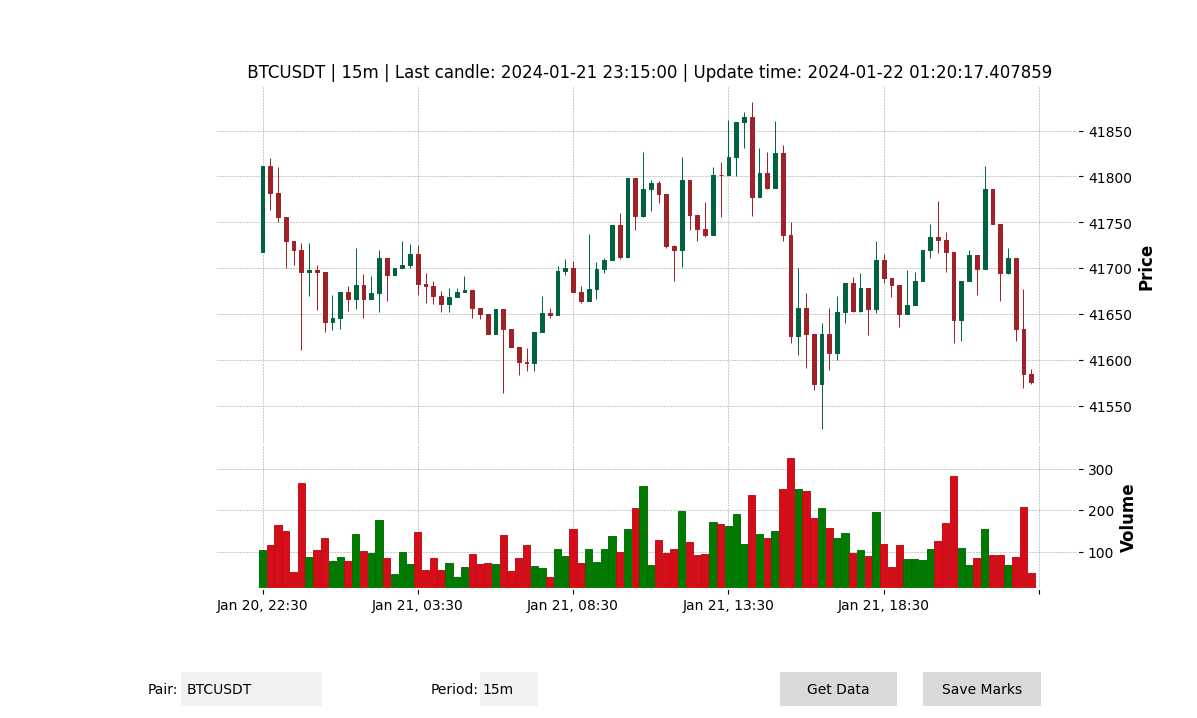

In [8]:
plt = CaptureOnClick(data_proc=dp)

# Utils 
* Load data (from Binance)
* Show collected symbols(pairs)/intervals
* Print debug output (captured over the plot)
* See into data details
  

In [9]:
#get_data adds the requested pair/interval to the datastore and sets dp.pair_df
dp.get_data('BTCUSDT', '4h')
print(dp.pair_df[0:5])

                         Open      High       Low     Close       Volume
Date                                                                    
2024-01-05 08:00:00  43777.48  44324.80  43433.00  43771.34   7055.63723
2024-01-05 12:00:00  43771.34  44110.07  43100.00  43500.01  10044.28040
2024-01-05 16:00:00  43500.01  43808.07  43100.46  43600.00   7460.07613
2024-01-05 20:00:00  43600.00  44357.46  43580.51  44145.11   6844.14656
2024-01-06 00:00:00  44145.12  44214.42  43812.50  43931.10   3123.46193


In [10]:
df = pd.DataFrame(dp.data_map)

#show non empty pair/interval data
for pair, intervals in df.items():
        for interval, values in intervals.items():
            if values['Updated'] is not None:
                print(f"Pair: {pair}, Interval: {interval}, StartDate: {values['StartDate']}, Updated: {values['Updated']}")

Pair: BTCUSDT, Interval: 15m, StartDate: 2024-01-20 22:30:00, Updated: 2024-01-22 01:20:17.407859
Pair: BTCUSDT, Interval: 1h, StartDate: 2024-01-17 20:00:00, Updated: 2024-01-22 01:20:50.591161
Pair: BTCUSDT, Interval: 4h, StartDate: 2024-01-05 08:00:00, Updated: 2024-01-22 01:21:23.247614


In [11]:
print(plt.captured_output)

Clicked coords: (14.872640869565217, 42853.63391304348, date: 2024-01-18 11:00:00)


In [12]:

#datamap initialized with SYMBOLS entries  each may hold OCHL data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore[DEF_SYMBOL][DEF_INTERVAL])

#default load:
last_updated = datamap[DEF_SYMBOL][DEF_INTERVAL]['Updated']
start_date = datamap[DEF_SYMBOL][DEF_INTERVAL]['StartDate']
end_date = datamap[DEF_SYMBOL][DEF_INTERVAL]['EndDate']


print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval}, between: {start_date} and {end_date}, loaded on {last_updated}  \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')


we have: 100 candles of BTCUSDT at 4h, between: 2024-01-20 22:30:00 and 2024-01-21 23:15:00, loaded on 2024-01-22 01:20:17.407859  

(15, 4) (15, 4) (100, 5) 

DatetimeIndex(['2024-01-20 22:30:00', '2024-01-20 22:45:00',
               '2024-01-20 23:00:00', '2024-01-20 23:15:00',
               '2024-01-20 23:30:00'],
              dtype='datetime64[ns]', name='Date', freq=None) 

                         Open      High       Low     Close     Volume
Date                                                                  
2024-01-20 22:30:00  41717.91  41811.29  41717.90  41811.28  105.15595
2024-01-20 22:45:00  41811.29  41819.99  41763.10  41781.53  116.09399
2024-01-20 23:00:00  41781.54  41809.87  41750.85  41755.90  164.93991
2024-01-20 23:15:00  41755.91  41755.91  41700.00  41729.81  150.75242
2024-01-20 23:30:00  41729.81  41729.81  41703.18  41719.73   51.04672 



In [ ]:
del pd
del plt